In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import scipy.io
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib inline

from load_Marvel_Comics import load_temporal_MC_flow_graph

In [2]:
test = scipy.io.loadmat('S.mat')
community = test['S']
cols = ['steelblue', 'darksalmon', 'mediumseagreen', 'yellow']
color = [cols[i[0]-1] for i in community]

In [3]:
# let's start with the important stuff. pick your colors.

In [2]:
np.random.seed(1)

In [5]:
graphs = load_temporal_MC_flow_graph('.', outnet = True)

C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\load_Marvel_Comics.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layers[0]['issue'] = layers[0]['comic'].str[2:]
C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\load_Marvel_Comics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues1.iloc[i, 2] = issues1.iloc[i, 2].split("/",1)[0]
C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\load_Marvel_Comics.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

['ANT-MAN/DR. HENRY J.', 'ATTUMA', 'BEAST/HENRY &HANK& P', 'BINARY/CAROL DANVERS', 'BLACK KNIGHT V/DANE', "BLACK PANTHER/T'CHAL", 'BLACK WIDOW/NATASHA', 'CAPTAIN AMERICA', 'CAPTAIN MARVEL II/MO', 'COUNT NEFARIA, LUCHI', 'CRYSTAL [INHUMAN]', 'DAREDEVIL/MATT MURDO', 'DR. DRUID/ANTHONY LU', 'FALCON/SAM WILSON', 'GRIM REAPER/ERIC WIL', 'GYRICH, HENRY PETER', 'HAWK', 'HELLCAT/PATSY WALKER', 'HERCULES [GREEK GOD]', 'HULK/DR. ROBERT BRUC', 'HUMAN TORCH/JOHNNY S', 'ICEMAN/ROBERT BOBBY', 'INVISIBLE WOMAN/SUE', 'IRON MAN/TONY STARK', 'JARVIS, EDWIN', 'LUNA/LUNA MAXIMOFF [', 'MOCKINGBIRD/DR. BARB', 'MOONDRAGON/HEATHER D', 'MR. FANTASTIC/REED R', "O'BRIEN, MICHAEL", 'PHARAOH RAMA-TUT', 'POWER MAN/ERIK JOSTE', 'QUICKSILVER/PIETRO M', 'SCARLET WITCH/WANDA', 'SHE-HULK/JENNIFER WA', 'SPIDER-MAN/PETER PARKER', 'STARFOX/EROS', 'SUB-MARINER/NAMOR MA', 'SWORDSMAN/JACQUES DU', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'TIGRA/GREER NELSON', 'ULTRON', 'VISION', 'WASP/JANET VAN DYNE', 'WIZARD/BENTLEY WI

In [7]:
graphs['networks']['heroes']

In [8]:
# Imagine you have three node-aligned snapshots of a network
G1 = graphs['networks']['silver']
G2 = graphs['networks']['bronze']
G3 = graphs['networks']['modern']
G4 = graphs['networks']['heroes']

pos = nx.spring_layout(G1) # assuming common node location
graphs = [G1,G2, G3, G4]

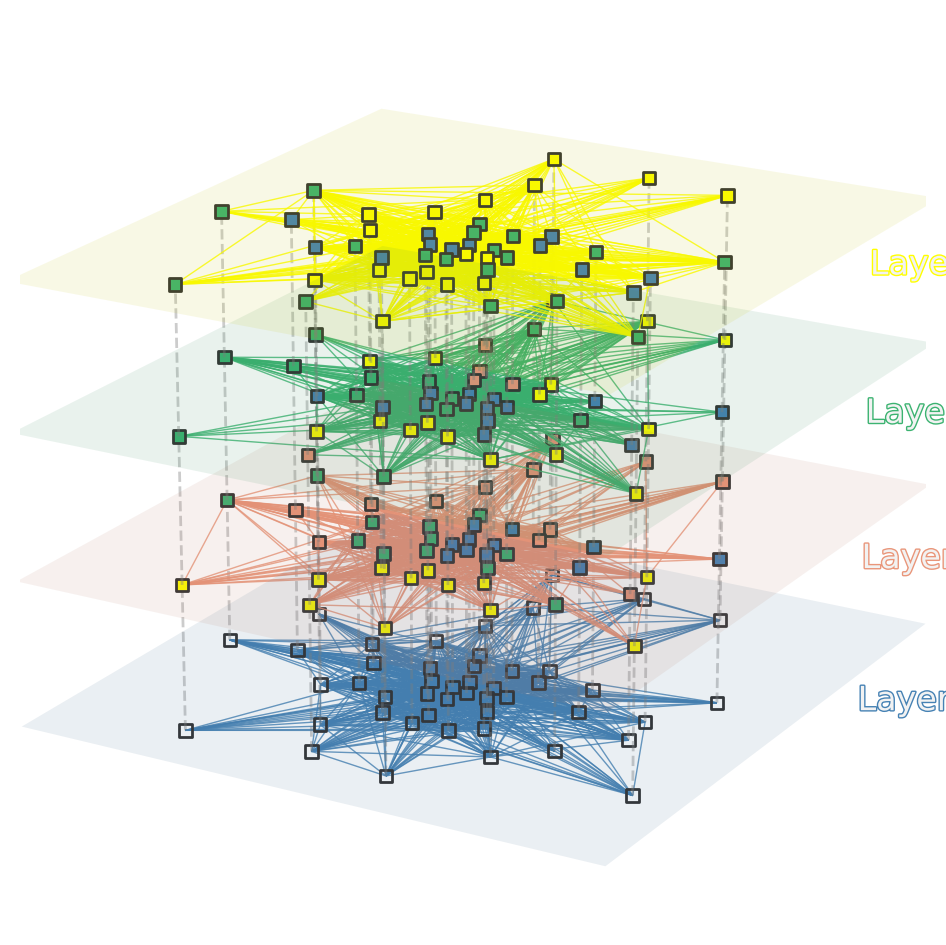

In [10]:
w = 8
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = color[(47*(gi-1)):(47*gi)]
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in list(G.nodes())]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi, color=cols[gi], alpha=0.8, linewidth=0.5)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.15, gi*0.95+0.5, "Layer %i"%(gi+1),
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=1, foreground=cols[gi]),
                                      path_effects.Normal()])

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 8.5

ax.set_axis_off()

# plt.savefig('multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()

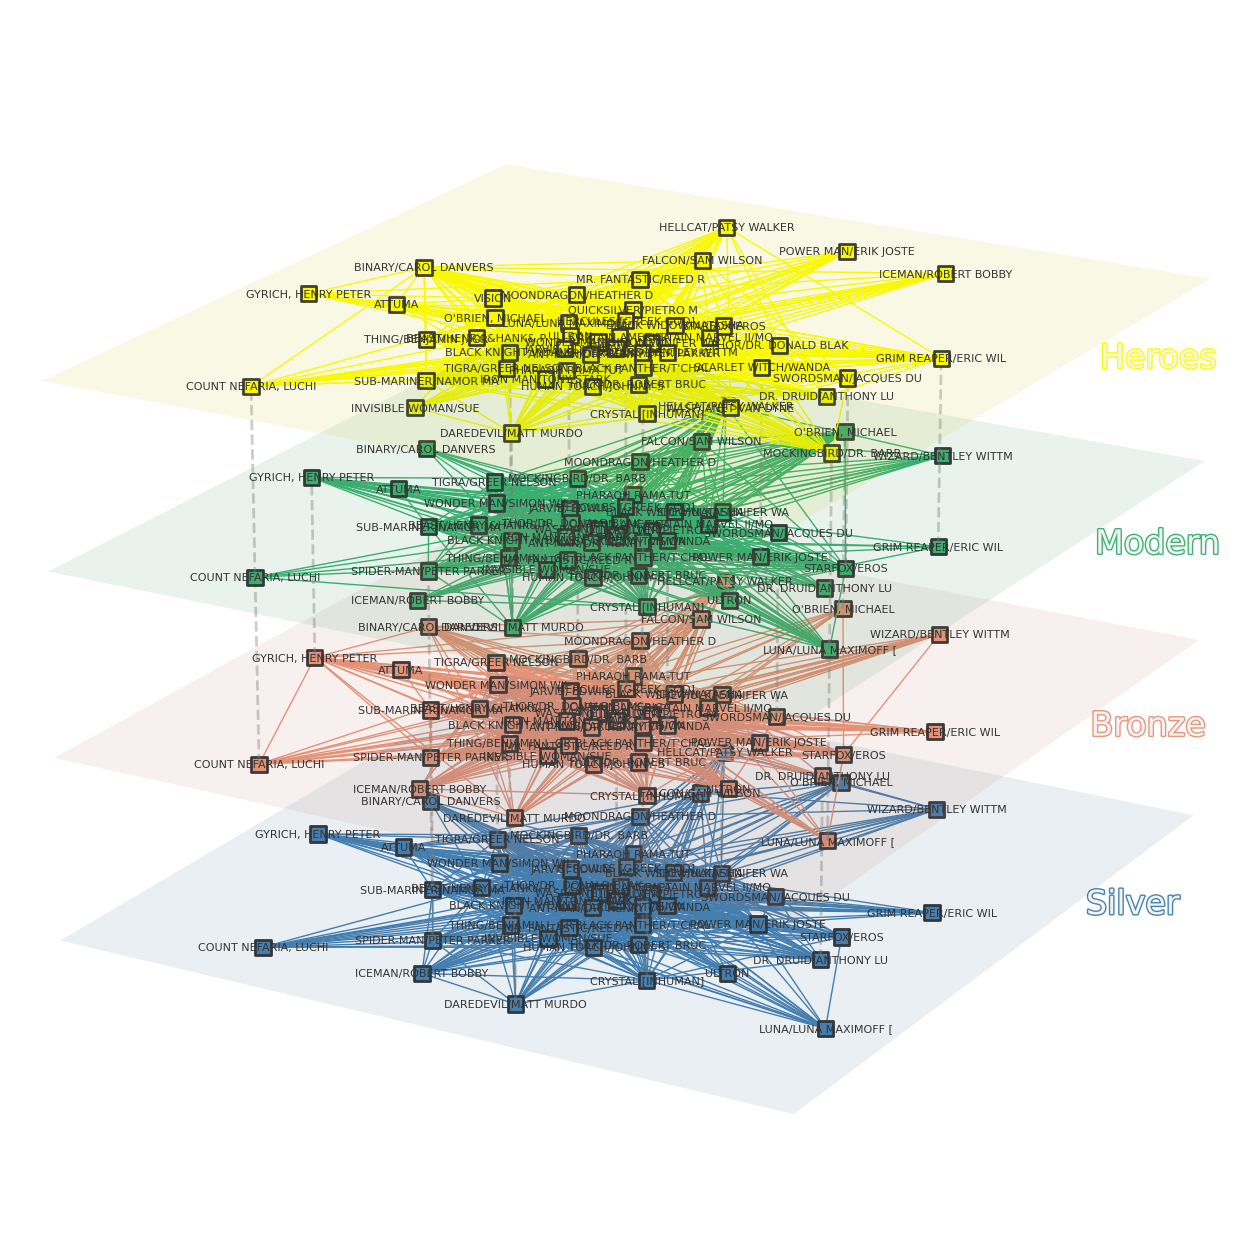

In [13]:
w = 10
h = 8

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})
layers = ['Silver', 'Bronze', 'Modern', 'Heroes']


for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi-1, color=cols[gi], alpha=1, linewidth=0.5)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, s=30, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    # if you want labels...
    for li, lab in enumerate(list(G.nodes())):
        ax.text(xs[li], ys[li], zs[li], lab, color='.2', zorder=gi+200, fontsize=4,
                ha='center', va='center')
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.1, gi*0.95+0.5, layers[gi],
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=1, foreground=cols[gi]),
                                      path_effects.Normal()])
    

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 9.0

ax.set_axis_off()

# plt.savefig('multilayer_network_wlabels.png',dpi=425,bbox_inches='tight')
plt.show()

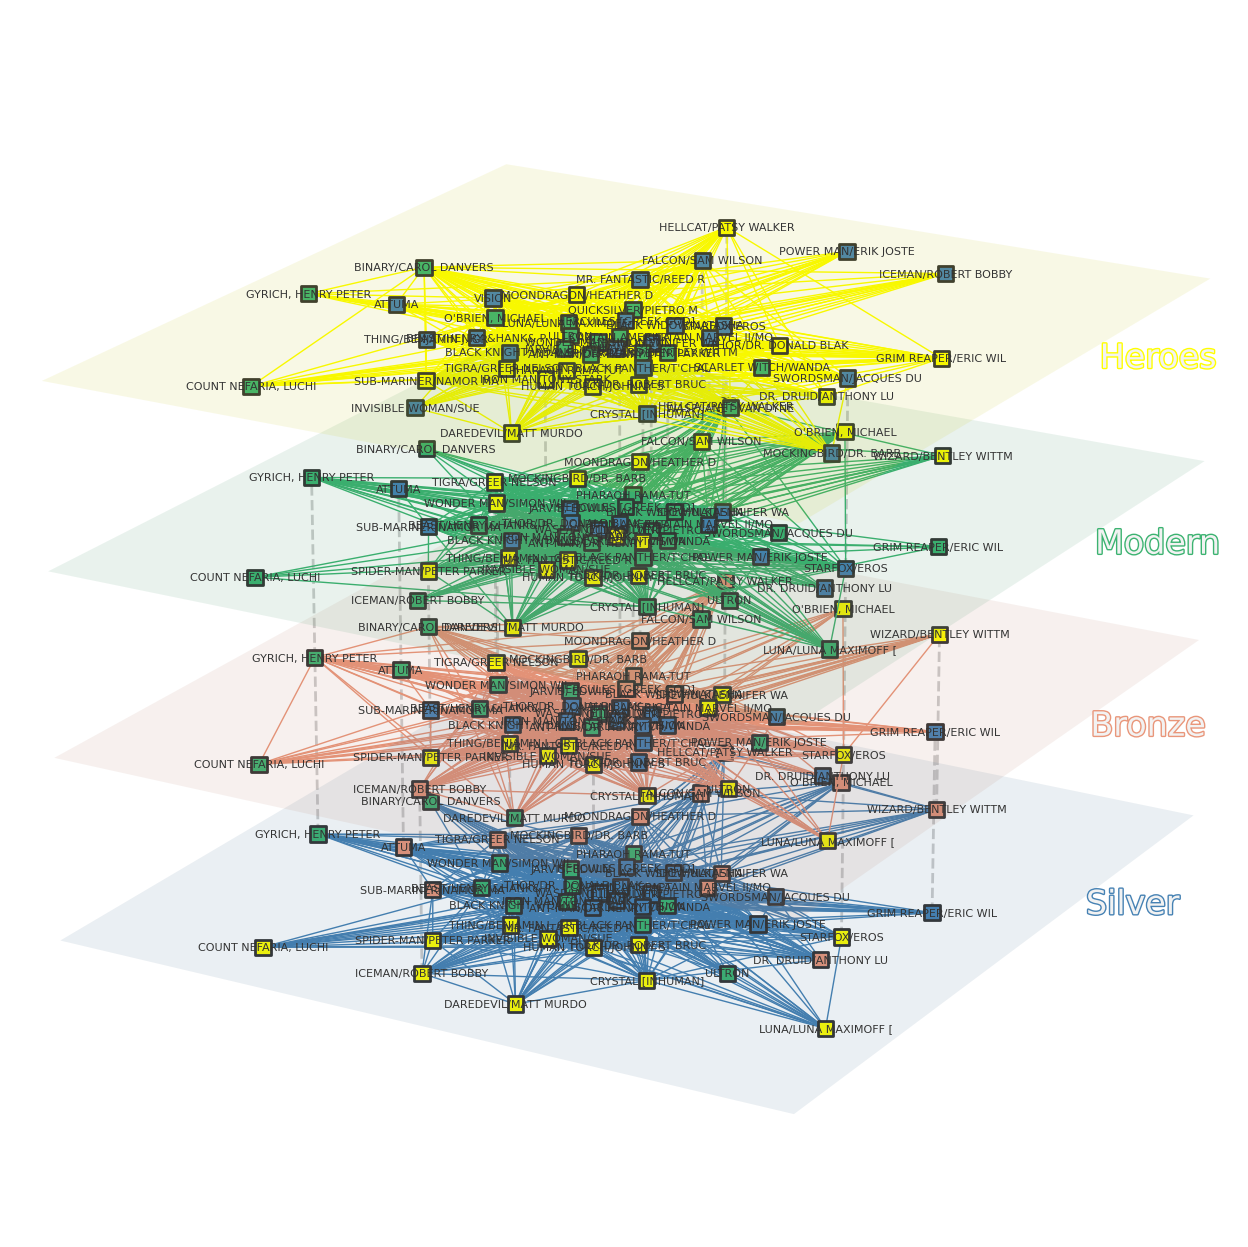

In [15]:
w = 10
h = 8

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})
layers = ['Silver', 'Bronze', 'Modern', 'Heroes']


for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = color[(47*gi):(47*(gi+1))]
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi-1, color=cols[gi], alpha=1, linewidth=0.5)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, s=30, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    # if you want labels...
    for li, lab in enumerate(list(G.nodes())):
        ax.text(xs[li], ys[li], zs[li], lab, color='.2', zorder=gi+200, fontsize=4,
                ha='center', va='center')
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.1, gi*0.95+0.5, layers[gi],
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=1, foreground=cols[gi]),
                                      path_effects.Normal()])
    

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 9.0

ax.set_axis_off()

# plt.savefig('multilayer_network_wlabels.png',dpi=425,bbox_inches='tight')
plt.show()

In [4]:
graphs = load_temporal_MC_flow_graph('.', outnet = True, size = 10)

C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\load_Marvel_Comics.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layers[0]['issue'] = layers[0]['comic'].str[2:]
C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\load_Marvel_Comics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues1.iloc[i, 2] = issues1.iloc[i, 2].split("/",1)[0]
C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\load_Marvel_Comics.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

['CAPTAIN AMERICA', 'HUMAN TORCH/JOHNNY S', 'INVISIBLE WOMAN/SUE', 'IRON MAN/TONY STARK', 'MR. FANTASTIC/REED R', 'SCARLET WITCH/WANDA', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'VISION', 'WASP/JANET VAN DYNE']
['CAPTAIN AMERICA', 'HUMAN TORCH/JOHNNY S', 'INVISIBLE WOMAN/SUE', 'IRON MAN/TONY STARK', 'MR. FANTASTIC/REED R', 'SCARLET WITCH/WANDA', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'VISION', 'WASP/JANET VAN DYNE']
['CAPTAIN AMERICA', 'HUMAN TORCH/JOHNNY S', 'INVISIBLE WOMAN/SUE', 'IRON MAN/TONY STARK', 'MR. FANTASTIC/REED R', 'SCARLET WITCH/WANDA', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'VISION', 'WASP/JANET VAN DYNE']
['CAPTAIN AMERICA', 'HUMAN TORCH/JOHNNY S', 'INVISIBLE WOMAN/SUE', 'IRON MAN/TONY STARK', 'MR. FANTASTIC/REED R', 'SCARLET WITCH/WANDA', 'THING/BENJAMIN J. GR', 'THOR/DR. DONALD BLAK', 'VISION', 'WASP/JANET VAN DYNE']


In [5]:
# Imagine you have three node-aligned snapshots of a network
G1 = graphs['networks']['silver']
G2 = graphs['networks']['bronze']
G3 = graphs['networks']['modern']
G4 = graphs['networks']['heroes']

pos = nx.spring_layout(G1) # assuming common node location
graphs = [G1, G2, G3, G4]

In [24]:
cols = ['steelblue', 'darksalmon', 'mediumseagreen', 'yellow']
color = []
               1  2  3  4  5  6  7  8  9  10
communities = [1, 3, 3, 2, 3, 1, 3, 2, 2, 1,
               1, 2, 2, 1, 2, 1, 2, 1, 1, 3,
               2, 1, 1, 3, 1, 1, 1, 2, 3, 2,
               1, 2, 2, 1, 2, 1, 2, 1, 1, 1]
for i in range(4):
    for j in [1, 7, 2, 4, 5, 6, 9, 3, 10, 8]:
        color.append(cols[communities[i*10 + j -1] - 1])
print(color)

['steelblue', 'mediumseagreen', 'yellow', 'mediumseagreen', 'yellow', 'steelblue', 'steelblue', 'yellow', 'mediumseagreen', 'yellow', 'steelblue', 'steelblue', 'yellow', 'steelblue', 'yellow', 'steelblue', 'mediumseagreen', 'yellow', 'steelblue', 'yellow', 'steelblue', 'mediumseagreen', 'yellow', 'mediumseagreen', 'yellow', 'yellow', 'steelblue', 'yellow', 'steelblue', 'yellow', 'mediumseagreen', 'mediumseagreen', 'yellow', 'mediumseagreen', 'yellow', 'mediumseagreen', 'mediumseagreen', 'yellow', 'mediumseagreen', 'yellow']


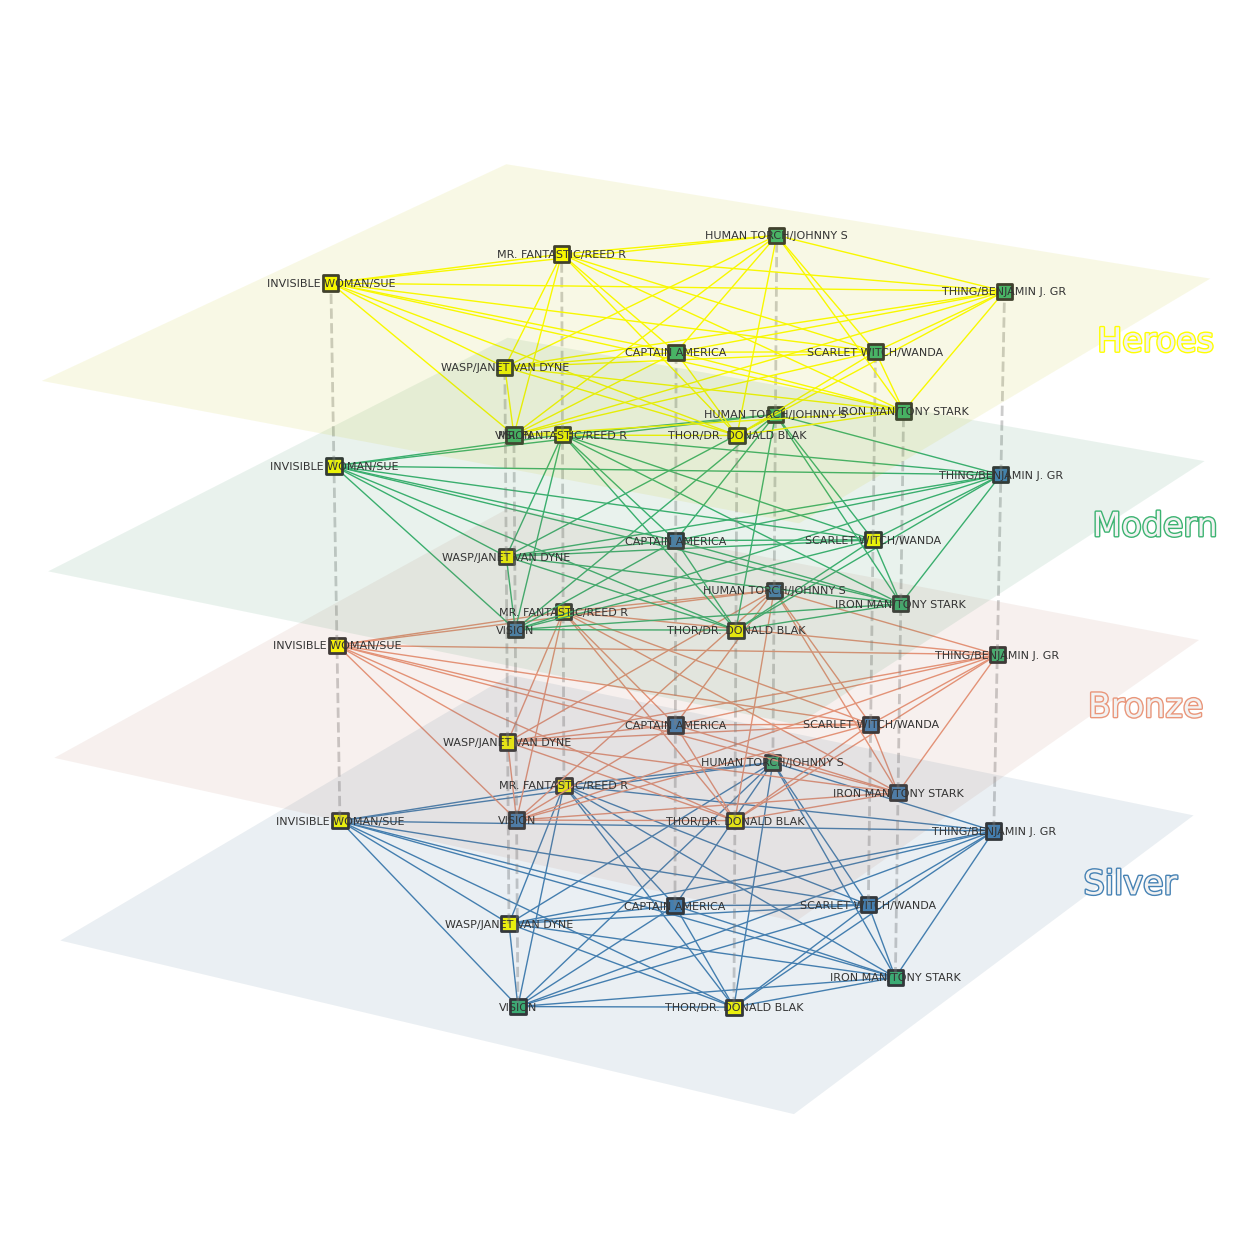

In [23]:
w = 10
h = 8

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})
layers = ['Silver', 'Bronze', 'Modern', 'Heroes']


for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = color[(10*gi):(10*(gi+1))]
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi-1, color=cols[gi], alpha=1, linewidth=0.5)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, s=30, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    # if you want labels...
    for li, lab in enumerate(list(G.nodes())):
        ax.text(xs[li], ys[li], zs[li], lab, color='.2', zorder=gi+200, fontsize=4,
                ha='center', va='center')
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.1, gi*0.95+0.5, layers[gi],
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=1, foreground=cols[gi]),
                                      path_effects.Normal()])
    

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 9.0

ax.set_axis_off()

# plt.savefig('multilayer_network_wlabels.png',dpi=425,bbox_inches='tight')
plt.show()

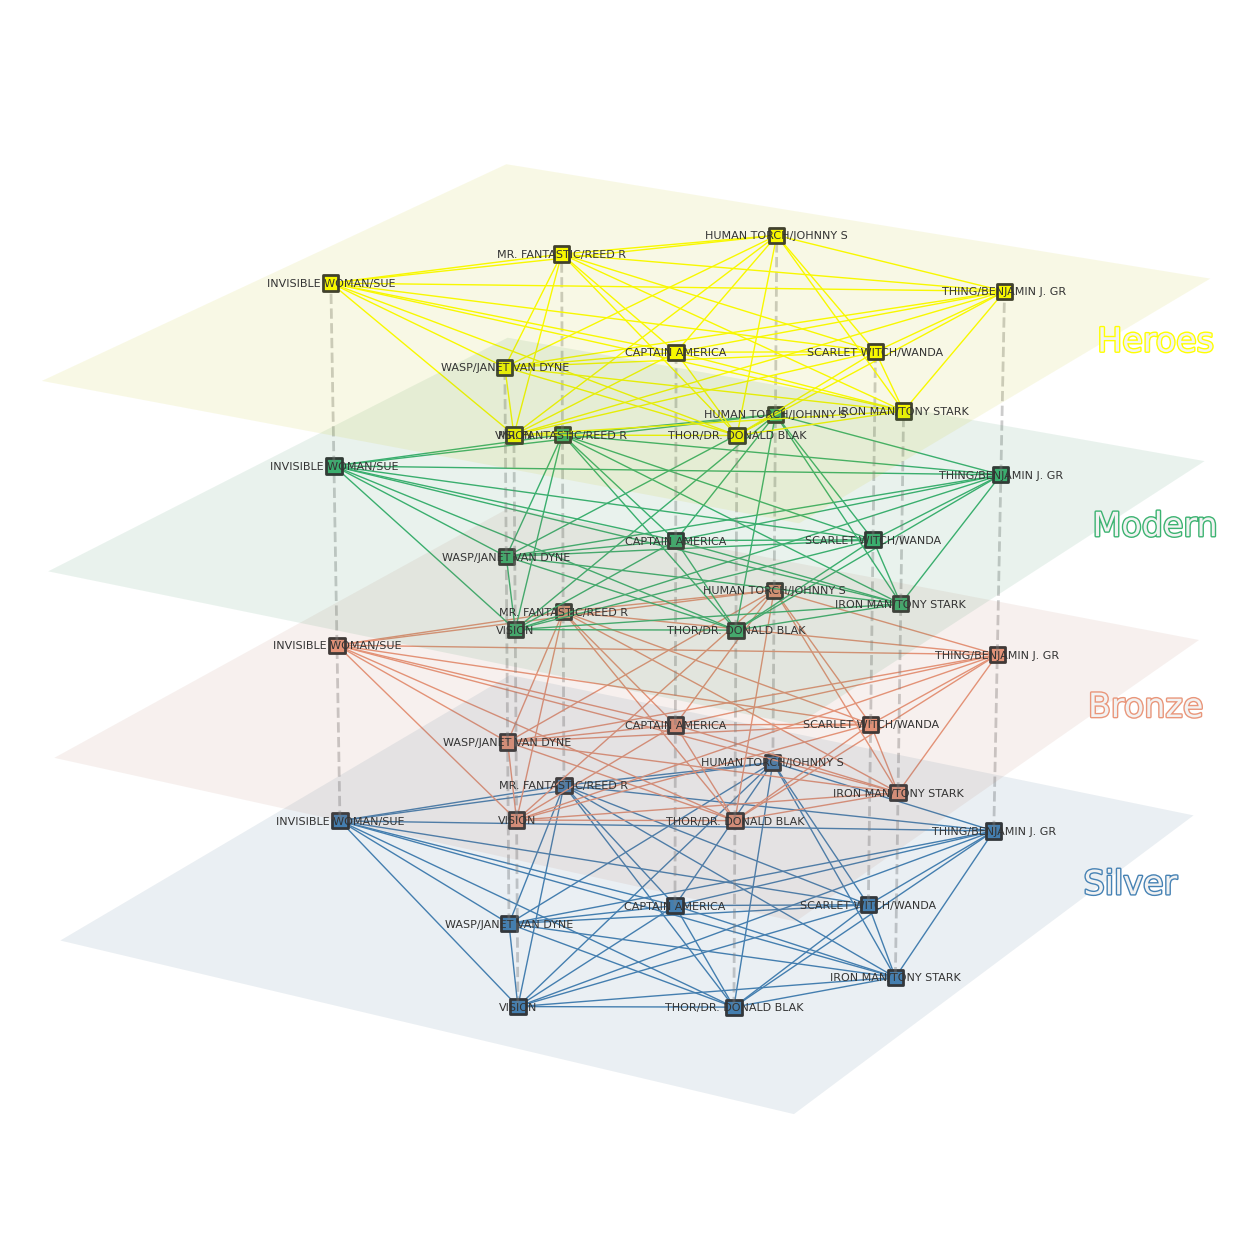

In [8]:
w = 10
h = 8

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})
layers = ['Silver', 'Bronze', 'Modern', 'Heroes']


for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi-1, color=cols[gi], alpha=1, linewidth=0.5)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, s=30, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    # if you want labels...
    for li, lab in enumerate(list(G.nodes())):
        ax.text(xs[li], ys[li], zs[li], lab, color='.2', zorder=gi+200, fontsize=4,
                ha='center', va='center')
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.1, gi*0.95+0.5, layers[gi],
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=1, foreground=cols[gi]),
                                      path_effects.Normal()])
    

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 9.0

ax.set_axis_off()

# plt.savefig('multilayer_network_wlabels.png',dpi=425,bbox_inches='tight')
plt.show()

In [11]:
graphs = load_temporal_MC_flow_graph('.', size = 'full', outnet = True)

C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\load_Marvel_Comics.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layers[0]['issue'] = layers[0]['comic'].str[2:]
C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\load_Marvel_Comics.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues1.iloc[i, 2] = issues1.iloc[i, 2].split("/",1)[0]
C:\Users\shenc\OneDrive - UCLA IT Services\2022F\Math 168\Project\load_Marvel_Comics.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

['ABSORBING MAN/CARL C', 'ADAMS, NICOLE NIKKI', 'ADORA', 'AGINAR', 'AJAK/TECUMOTZIN [ETE', 'AMENHOTEP', 'AMERICAN EAGLE II/JA', 'AMPERE/', 'AMPHIBIAN/KINGLEY RI', 'AMPHIBIUS', 'ANELLE', 'ANGEL/WARREN KENNETH', 'ANNIHILUS', 'ANT-MAN II/SCOTT HAR', 'ANT-MAN/DR. HENRY J.', 'ANTOINETTE, MARIE', 'APE MAN/GORDON MONK', 'APOCRYPHUS', 'APOLLO [GREEK GOD]', 'AQUARIUS/DARREN BENT', 'ARAGORN', 'ARBOGAST, BAMBI', 'ARCANNA/ARCANNA JONE', 'ARES [GREEK GOD]', 'ARIDES', 'ARIES II/GROVER RAYM', 'ARIES/MARCUS LASSITE', 'ARISHEM [CELESTIAL]', 'ARKON', 'ARSENAL', 'ARSENIC', 'ARTEMIS', 'ASTROVIK, NORMA', 'ATHENA [GREEK GOD]', 'ATLAS', 'ATTUMA', 'AURORA/JEANNE-MARIE', 'AVALANCHE/DOMINIC PE', 'BALDER [ASGARDIAN]', 'BALE, EMERSON', 'BALLANTINE, KAYLA', 'BALOR', 'BANNER, BETTY ROSS T', 'BARBARUS', 'BARIUM', 'BARON BLOOD/JOHN FAL', 'BARON BRIMSTONE/', 'BARRANCO, MARIA ESME', 'BASALLO/LAVA MEN KIN', 'BEAST/HENRY &HANK& P', 'BEDLAM II/OLISA KABA', 'BEERE, JASON', 'BEETLE/ABNER RONALD', 'BENEDICT', 'BERDITCHEV, IT

In [17]:
# Imagine you have three node-aligned snapshots of a network
G1 = graphs['networks']['silver']
G2 = graphs['networks']['bronze']
G3 = graphs['networks']['modern']
G4 = graphs['networks']['heroes']

pos = nx.random_layout(G1) # assuming common node location
graphs = [G1,G2, G3, G4]

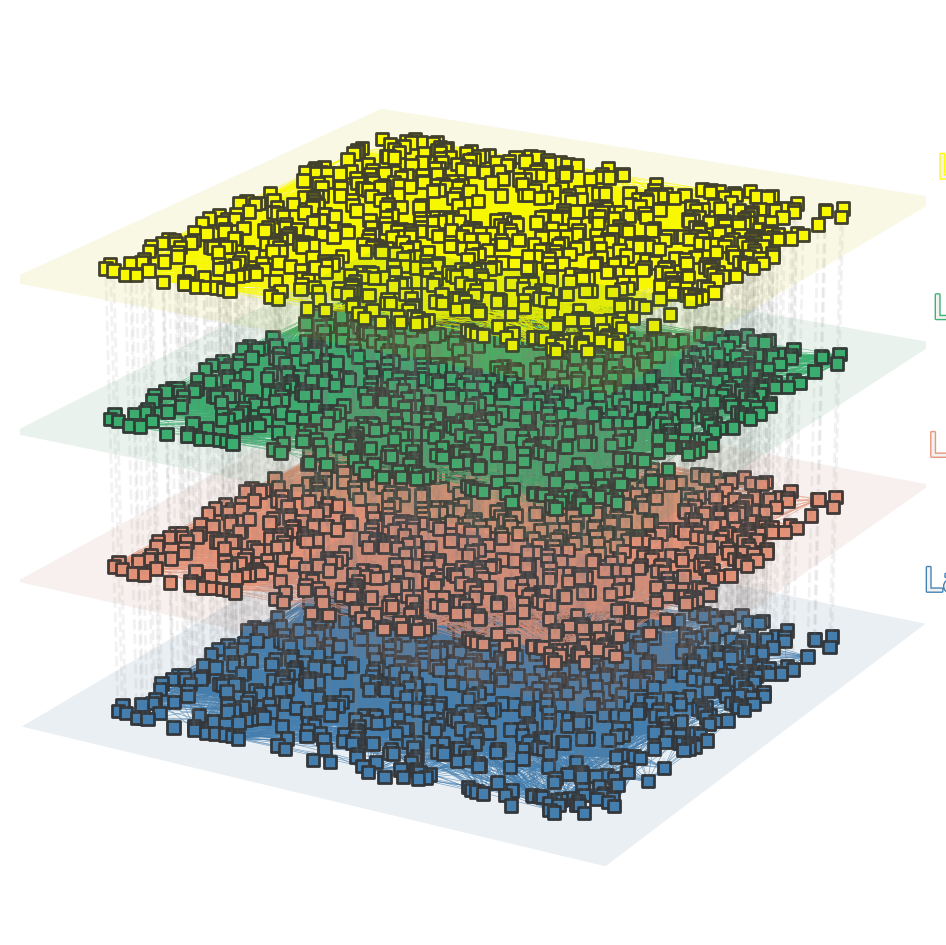

In [21]:
w = 8
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in list(G.nodes())]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.1, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi, color=cols[gi], alpha=0.8, linewidth=0.2)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.15, gi*0.95+0.5, "Layer %i"%(gi+1),
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=1, foreground=cols[gi]),
                                      path_effects.Normal()])

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 8.5

ax.set_axis_off()

# plt.savefig('multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()